# PART 2 - Evaluation of COMPAS dataset

#### Group Members : 
                Marck-Edward KEMEH - marck-edward.kemeh@grenoble-inp.org
                Irman FAQRIZAL - irman.faqrizal@univ-grenoble-alpes.fr
        

## Fair Classifiers
Machine Learning or data analysis which is one of the most used AI techniques relies heavily on dataand this data can be biased because it is provided by humans. such is the case for our case study "COMPASS Dataset". Most of the data provided as seen in our analysis in part 1 is highly biased against African- Americans being by gender or age category. African-American defendants were more vulnerable to be incorrectly labeled as higher-risk than they actually were when compared to their white defendants.

There has been some proposal on achieving fairness on a dataset for classification or prediction. Most of these firness criterias are based on the some of the following criterias;

          
           1.Demographic Parity / Independence
           2.Equalized odds / Seperation
           
### 1. Independence
This refers to the notion that decision rates of the people involved in anything from the two different group must be equal. such groups can be race, gender, age category as seen from compass. From our dataset exploration in part 1, we saw that there is a huge gap in any of these groups. The  dataset is not fair in this notion, There is a higher number of men as compared to women, the total number of people in 25-45 age category is far greater than any other age group. Nt forgetting race were African Americans are far more than any otherr race combined. Even some racee like Asian seem not to appear on some of these graph due to the very few number of people.

### 2. Seperation
Seperation is used when there is a strong will to predict positive outcomes correctly. We need to minimise false positives.
Perdicting if someone should be sentenced for a crime is a decision which deserves the maximum accuracy. Unlike prediction with COMPASS, there is a high possibility of wrongly sentencing or given a high label to someone who does not deserve it whhich is a false positive in this case.


In this part of our project , we will use Independence

In [38]:
# Increase my page width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import urllib
import os,sys
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import math
import torch.nn.functional as F
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pylab import rcParams
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, preprocessing
from random import seed, shuffle
from sklearn import preprocessing
RANDOM_SEED = 42

def check_data_file(fname):
    files = os.listdir(".") # get the current directory listing
    print("Looking for file '%s' in the current directory...",fname)

    if fname not in files:
        print("'%s' not found! Downloading from GitHub...",fname)
        addr = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
        response = urllib.request.urlopen(addr)
        data = response.read()
        fileOut = open(fname, "wb")
        fileOut.write(data)
        fileOut.close()
        print("'%s' download and saved locally..",fname)
    else:
        print("File found in current directory..")
    
COMPAS_INPUT_FILE = "compas-scores-two-years.csv"
check_data_file(COMPAS_INPUT_FILE)
df=pd.read_csv('compas-scores-two-years.csv')

# preparing data by selecting needed colums and removing empty values
df = df[['race','sex', 'age_cat', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 
         'is_violent_recid', 'v_decile_score', 'event', 'two_year_recid']]
df = df.dropna(how='any')

# Replace text with numbers
df['sex'].replace({'Male': 1, 'Female': 2}, inplace = True)
df['age_cat'].replace({'Greater than 45': 1, '25 - 45': 2, 'Less than 25': 3}, inplace = True)
df['c_charge_degree'].replace({'F': 1, 'M': 2}, inplace = True)
df['race'].replace({'Other': 1, 'African-American': 2, 'Caucasian': 3, 'Hispanic': 4, 'Native American': 5, 'Asian': 6}, inplace = True)

#splitting and converting data to tensor
# X = df[['sex','age_cat', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 
#          'is_violent_recid', 'v_decile_score', 'event']]
X = df[[ 'event']]
y = df[['two_year_recid']] #ground truth

# Arrange the data : Training, Testing, Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.1, random_state=RANDOM_SEED)

# X_train.astype(dtype = 'float32')
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())
X_validate = torch.from_numpy(X_validate.to_numpy()).float()
y_validate = torch.squeeze(torch.from_numpy(y_validate.to_numpy()).float())

print("Training\t :"+ str(X_train.shape) +", "+ str(y_train.shape))
print("Testing\t\t :"+ str(X_test.shape) +", "+ str(y_test.shape))
print("Validation\t :"+ str(X_validate.shape) +", "+ str(y_validate.shape))


Looking for file '%s' in the current directory... compas-scores-two-years.csv
File found in current directory..
Training	 :torch.Size([5193, 1]), torch.Size([5193])
Testing		 :torch.Size([1443, 1]), torch.Size([1443])
Validation	 :torch.Size([578, 1]), torch.Size([578])


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 


classification report 
               precision    recall  f1-score   support

    No Recid       0.87      0.98      0.92       823
       Recid       0.96      0.80      0.87       620

    accuracy                           0.90      1443
   macro avg       0.91      0.89      0.90      1443
weighted avg       0.91      0.90      0.90      1443

Overall Accuracy :  0.9002079002079002


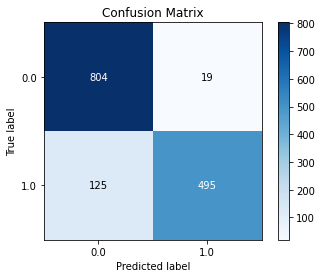

In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print (clf,'\n\n')

#prediction
y_pred = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
print('classification report \n', classification_report(y_test, y_pred, target_names=classes))
print("Overall Accuracy : " , str(accuracy_score(y_test, y_pred)))

dffair1 = df.loc[(df['race']==2)]
Xfair1 = dffair1[['race', 'event']]
yfair1 = dffair1[['two_year_recid']]

dffair2 = df.loc[(df['race']!=2)]
Xfair2 = dffair2[['race', 'event']]
yfair2 = dffair2[['two_year_recid']]

classification report 
               precision    recall  f1-score   support

    No Recid       0.87      0.98      0.92       823
       Recid       0.96      0.80      0.87       620

    accuracy                           0.90      1443
   macro avg       0.91      0.89      0.90      1443
weighted avg       0.91      0.90      0.90      1443

Overall Accuracy :  0.9002079002079002


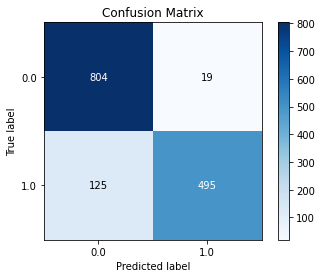

In [39]:
#Decision Trees
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# print (clf,'\n\n')

#prediction
y_pred = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
print('classification report \n', classification_report(y_test, y_pred, target_names=classes))
print("Overall Accuracy : " , str(accuracy_score(y_test, y_pred)))

dffair1 = df.loc[(df['race']==2)]
Xfair1 = dffair1[[ 'event']]
yfair1 = dffair1[['two_year_recid']]

dffair2 = df.loc[(df['race']!=2)]
Xfair2 = dffair2[['event']]
yfair2 = dffair2[['two_year_recid']]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 


classification report 
               precision    recall  f1-score   support

    No Recid       0.87      0.98      0.92       823
       Recid       0.96      0.80      0.87       620

    accuracy                           0.90      1443
   macro avg       0.91      0.89      0.90      1443
weighted avg       0.91      0.90      0.90      1443

Overall Accuracy :  0.9002079002079002


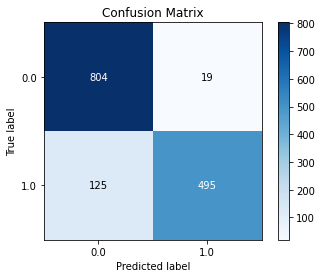

In [33]:
#logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print (clf,'\n\n')

#prediction
y_pred = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
print('classification report \n', classification_report(y_test, y_pred, target_names=classes))
print("Overall Accuracy : " , str(accuracy_score(y_test, y_pred)))

dffair1 = df.loc[(df['race']==2)]
Xfair1 = dffair1[['race', 'event']]
yfair1 = dffair1[['two_year_recid']]

dffair2 = df.loc[(df['race']!=2)]
Xfair2 = dffair2[['race', 'event']]
yfair2 = dffair2[['two_year_recid']]

Net(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)


epoch {0} 	==> Train : - Loss: 0.701, Acc: 0.479 	|| Validation : - Loss: 0.705, Acc: 0.453
epoch {50} 	==> Train : - Loss: 0.579, Acc: 0.865 	|| Validation : - Loss: 0.57, Acc: 0.879
epoch {100} 	==> Train : - Loss: 0.467, Acc: 0.865 	|| Validation : - Loss: 0.438, Acc: 0.879
epoch {150} 	==> Train : - Loss: 0.435, Acc: 0.865 	|| Validation : - Loss: 0.407, Acc: 0.879
epoch {200} 	==> Train : - Loss: 0.417, Acc: 0.865 	|| Validation : - Loss: 0.39, Acc: 0.879
epoch {250} 	==> Train : - Loss: 0.406, Acc: 0.865 	|| Validation : - Loss: 0.379, Acc: 0.879
epoch {300} 	==> Train : - Loss: 0.398, Acc: 0.865 	|| Validation : - Loss: 0.372, Acc: 0.879
epoch {350} 	==> Train : - Loss: 0.392, Acc: 0.865 	|| Validation : - Loss: 0.367, Acc: 0.879
epoch {400} 	==> Train : - Loss: 0.388, Acc: 0.865 	|| Validation : - 

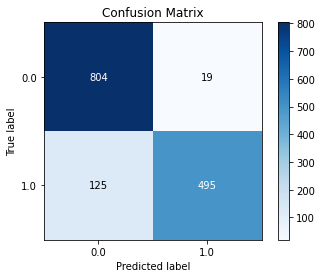

In [32]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

net = Net(X_train.shape[1])
print(net)

def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

# criterion = torch.nn.MSELoss(reduction='sum')
# criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
print("\n")

max_epochs = 1000
batch_size = 1000
batch_number = math.ceil(len(X_train)/batch_size)
for epoch in range (max_epochs):
    for batch_idx in range (batch_number):
        # Set up batch
        batch_end = ((batch_idx+1) * batch_size -1)
        batch_start = batch_idx * batch_size
        if (batch_idx == (batch_number-1)):
            batch_end = (len(X_train) -1)
        batch_x = X_train[batch_start : batch_end]
        batch_y = y_train[batch_start : batch_end]
        
        # Fit the training data and validate
        train_pred = net(batch_x)
        train_pred = torch.squeeze(train_pred)
        train_loss = criterion(train_pred, batch_y)
        train_acc = calculate_accuracy(batch_y, train_pred)
        y_validate_pred = net(X_validate)
        y_validate_pred = torch.squeeze(y_validate_pred)
        validate_loss = criterion(y_validate_pred, y_validate)
        validation_acc = calculate_accuracy(y_validate, y_validate_pred)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    if epoch % 50 == 0:
        print( f'''epoch { {epoch} } \t==> Train : - Loss: {round_tensor(train_loss)}, Acc: {round_tensor(train_acc)} \t|| Validation : - Loss: {round_tensor(validate_loss)}, Acc: {round_tensor(validation_acc)}''')

# Test the model using test set
classes = ['No Recid', 'Recid']
y_pred = net(X_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()
print(classification_report(y_test, y_pred, target_names=classes))
print("Overall Accuracy : " , str(accuracy_score(y_test, y_pred)))
skplt.metrics.plot_confusion_matrix(y_test, y_pred)